<a href="https://colab.research.google.com/github/rasathuraikaran/Machinelearning/blob/main/GeminiAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini API: Quickstart with Python

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
5. Use embeddings for large language models.
3. Generate text responses from multimodal inputs (text and images).


## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.


## Setup


### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:


In [1]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`


In [3]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('gemini')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). We offer options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [5]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the `GenerativeModel.generate_content` method:

In [12]:
%%time
response = model.generate_content("What is life")

CPU times: user 108 ms, sys: 12.8 ms, total: 121 ms
Wall time: 8.96 s


In [13]:
response.text

"Life is a complex and multifaceted phenomenon that has been the subject of philosophical, scientific, and religious inquiry for millennia. There is no single, universally accepted definition of life, but most scientists agree that it is a state of active existence characterized by certain key properties, including organization, metabolism, growth, reproduction, adaptation, and response to stimuli.\n\n**Organization:** Living organisms are highly organized structures composed of cells, tissues, organs, and organ systems. These components work together in a coordinated manner to maintain the organism's internal environment and carry out its life functions.\n\n**Metabolism:** Living organisms take in nutrients from their environment and convert them into energy through metabolic processes. These processes include respiration, photosynthesis, and fermentation. Metabolism allows organisms to grow, repair themselves, and reproduce.\n\n**Growth:** Living organisms grow and develop over time.

In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [14]:
to_markdown(response.text)

> Life is a complex and multifaceted phenomenon that has been the subject of philosophical, scientific, and religious inquiry for millennia. There is no single, universally accepted definition of life, but most scientists agree that it is a state of active existence characterized by certain key properties, including organization, metabolism, growth, reproduction, adaptation, and response to stimuli.
> 
> **Organization:** Living organisms are highly organized structures composed of cells, tissues, organs, and organ systems. These components work together in a coordinated manner to maintain the organism's internal environment and carry out its life functions.
> 
> **Metabolism:** Living organisms take in nutrients from their environment and convert them into energy through metabolic processes. These processes include respiration, photosynthesis, and fermentation. Metabolism allows organisms to grow, repair themselves, and reproduce.
> 
> **Growth:** Living organisms grow and develop over time. This process involves the synthesis of new cells and tissues, as well as the enlargement of existing cells. Growth is essential for the organism to reach maturity and reproduce.
> 
> **Reproduction:** Living organisms have the ability to reproduce, creating new individuals that are genetically similar to themselves. Reproduction is essential for the continuation of the species.
> 
> **Adaptation:** Living organisms have the ability to adapt to their environment over time. This process involves the accumulation of genetic changes that make the organism better suited to its particular ecological niche. Adaptation allows organisms to survive and reproduce in a variety of different environments.
> 
> **Response to stimuli:** Living organisms respond to stimuli from their environment. These stimuli can be physical (such as light, heat, or touch), chemical (such as odors or toxins), or biological (such as the presence of predators or prey). Responses to stimuli allow organisms to interact with their environment and maintain their homeostasis.
> 
> In addition to these key properties, life is also characterized by a certain degree of autonomy and self-maintenance. Living organisms are able to maintain their own internal environment and regulate their own activities, even in the face of changing external conditions. This autonomy is essential for life to persist in a changing world.
> 
> The study of life is called biology, and it is one of the most complex and challenging fields of science. Biologists seek to understand the nature of life, how it originated, and how it has evolved over time. They also study the interactions between organisms and their environment, and how these interactions affect the structure and function of ecosystems.
> 
> The concept of life is central to many aspects of human thought and culture. It is a source of wonder and fascination, and it is also a reminder of our own mortality. Life is a precious gift, and it is something that we should all cherish and protect.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to saftey concerns regarding the prompt.

In [15]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [16]:
response.candidates

[content {
  parts {
    text: "Life is a complex and multifaceted phenomenon that has been the subject of philosophical, scientific, and religious inquiry for millennia. There is no single, universally accepted definition of life, but most scientists agree that it is a state of active existence characterized by certain key properties, including organization, metabolism, growth, reproduction, adaptation, and response to stimuli.\n\n**Organization:** Living organisms are highly organized structures composed of cells, tissues, organs, and organ systems. These components work together in a coordinated manner to maintain the organism\'s internal environment and carry out its life functions.\n\n**Metabolism:** Living organisms take in nutrients from their environment and convert them into energy through metabolic processes. These processes include respiration, photosynthesis, and fermentation. Metabolism allows organisms to grow, repair themselves, and reproduce.\n\n**Growth:** Living organ

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [17]:
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        # stop_sequences=['x'],
        max_output_tokens=1500,
        temperature=1.0)
)

In [ ]:
response.candidates

[content {
  parts {
    text: "Once upon a time, in a small town nestled at the foot of a majestic mountain, there lived a curious and adventurous young girl named Alice. Every morning, Alice would set off on her journey to school with her trusty backpack, not knowing the magical secret it held within.\n\nAlice\'s backpack was no ordinary one. It was crafted from ancient, mystical fabric woven under the moonlight. Hidden within its seams were powerful enchantments, waiting to be unlocked by the right person. The backpack craved adventure and longed to be taken on extraordinary quests.\n\nAs Alice journeyed through her days, encountering both challenges and mundane tasks, the backpack whispered encouraging words through its soft fabric, urging her to dream big and seek the wonders that awaited her. Each step Alice took filled the backpack with excitement, and it began to warm with a soft glow.\n\nOn one fateful day, Alice found herself wandering into an enchanted forest, lured by the m

## Streaming


By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use `GenerativeModel.generate_content(..., stream=True)`.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 63.7 ms, sys: 7.52 ms, total: 71.2 ms
Wall time: 6.16 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

There is no definitive answer to the question "What is the meaning of life?"
________________________________________________________________________________
 as different individuals and cultures have varying interpretations and perspectives. Here are a few prevalent ideas about the meaning of life:

1. **Personal Fulfillment**: Some believe
________________________________________________________________________________
 that the meaning of life lies in achieving personal fulfillment and happiness. This can involve pursuing individual goals, passions, and experiences that bring a sense of meaning and satisfaction.

2. **Contribution and Impact**: Many people find meaning in making a positive impact on the world. This can involve contributing to society through charitable work,
________________________________________________________________________________
 community involvement, or professional achievements that benefit others.

3. **Purpose and Values**: Some individuals define the

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as `GenerativeModel.generate_content`. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is a machine that helps us do many things by following instructions we give it.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is a machine that helps us do many things by following instructions we give it."
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions, or a program. The program tells the computer what to do, and the computer follows the instructions to perform a task. The basic components of a computer
________________________________________________________________________________
 include the processor, memory, storage, input devices, and output devices. The processor, also known as the central processing unit (CPU), is the brain of the computer and carries out the instructions of the program. Memory, or random access memory (RAM), temporarily stores data and instructions that are being processed by the CPU
________________________________________________________________________________
. Storage devices, such as hard disk drives and solid-state drives, store data and programs permanently. Input devices, such as keyboards and mice, allow the user to interact 

`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer's memory. The computer's processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program's logic. The results of these calculations and decisions are then displayed on the computer's screen or stored in memory for later use.
> 
> To give you a simple analogy, imagine a computer as a chef following a recipe. The recipe is like the program, and the chef's actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs actions like gathering ingredients (fetching data from memory), mixing them together (performing calculations), and cooking them (processing data). The final dish (the output) is then presented on a plate (the computer screen).
> 
> In summary, a computer works by executing a series of instructions, stored in its memory, to perform calculations, make decisions, and display or store the results.

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


In [ ]:
len(result['embedding'])

768

Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
response = model.generate_content('How to break into a car?')
# response.candidates
to_markdown(response.text)

> I'm sorry, I'm not able to provide assistance with illegal activities. Breaking into a car is a crime, and I would not be able to help you with it.

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  }
]

In [ ]:
response = model.generate_content('How to break into a car. Walk me through a step by step process.', safety_settings=safety_settings)
to_markdown(response.text)

> I am sorry, but I am not able to provide you with a step-by-step process on how to break into a car. This information could be used for malicious purposes, and I am not able to assist you with it. If you have any questions or concerns about breaking into a car, please consult with a legal professional.

## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [18]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  2430k      0 --:--:-- --:--:-- --:--:-- 2440k


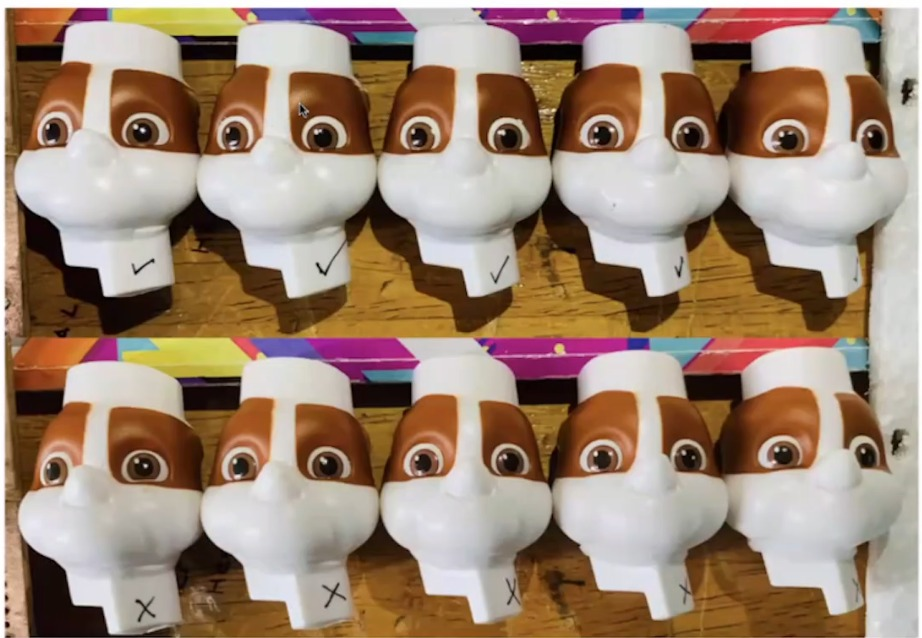

In [53]:
import PIL.Image

img = PIL.Image.open('/content/WhatsApp Image 2024-01-06 at 21.27.26.jpeg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [54]:
model = genai.GenerativeModel('gemini-pro-vision')


In [55]:

response = model.generate_content(img)

to_markdown(response.text)

>  defective

In [59]:
response = model.generate_content(["""Indicate the defectives and their position and explain their defects.""", img],)
response.resolve()

In [60]:
to_markdown(response.text)

>  There are 2 defectives, the first one is in the first row, the third head from the left has a small black dot on the left eye. The second defective is in the second row, the third head from the left has a small black dot on the right eye.

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).